## 问题
中心点的确定顺序  
range(node_number)  
[6,5,4,3,2,1,0]  
导致生成的路由矩阵只在i<j或i>j时输出正确  
route的输出结果不应该是对称矩阵  

In [125]:
def floyd(W):
    # 首先获取节点数
    node_number = len(W)

    # 初始化路由矩阵
    R = [[0 for i in range(node_number)] for j in range(node_number)]
    for i in range(node_number):
        for j in range(node_number):
            if W[i][j] > 0:
                R[i][j] = j+1
            else:
                R[i][j] = 0
    # 查看初始化的路由矩阵
    for row in R:
        print(row)

    # 循环求W_n和R_n
    for k in range(node_number):
        for i in range(node_number):
            for j in range(node_number):
                if W[i][k] > 0 and W[k][j] > 0 and (W[i][k] + W[k][j] < W[i][j] or W[i][j] == -1):
                    W[i][j] = W[i][k] + W[k][j]
                    R[i][j] = k+1
        print("第%d次循环:" % (k+1))
        print("距离矩阵:")
        for row in W:
            print(row)
        print("路由矩阵:")
        for row in R:
            print(row)
matrix = [[0, -1, -1, 1.2, 9.2, -1, -1],
          [-1, 0, -1, 5, -1, 3.1, 2],
          [-1, -1, 0, -1, -1, 4, 1.5],
          [1.2, 5, -1, 0, 6.7, -1, -1],
          [9.2, -1, -1, 6.7, 0, 15.6, -1],
          [-1, 3.1, 4, -1, 15.6, 0, -1],
          [-1, 2, 1.5, -1, -1, -1, 0]]
floyd(matrix)

[0, 0, 0, 4, 5, 0, 0]
[0, 0, 0, 4, 0, 6, 7]
[0, 0, 0, 0, 0, 6, 7]
[1, 2, 0, 0, 5, 0, 0]
[1, 0, 0, 4, 0, 6, 0]
[0, 2, 3, 0, 5, 0, 0]
[0, 2, 3, 0, 0, 0, 0]
第1次循环:
距离矩阵:
[0, -1, -1, 1.2, 9.2, -1, -1]
[-1, 0, -1, 5, -1, 3.1, 2]
[-1, -1, 0, -1, -1, 4, 1.5]
[1.2, 5, -1, 0, 6.7, -1, -1]
[9.2, -1, -1, 6.7, 0, 15.6, -1]
[-1, 3.1, 4, -1, 15.6, 0, -1]
[-1, 2, 1.5, -1, -1, -1, 0]
路由矩阵:
[0, 0, 0, 4, 5, 0, 0]
[0, 0, 0, 4, 0, 6, 7]
[0, 0, 0, 0, 0, 6, 7]
[1, 2, 0, 0, 5, 0, 0]
[1, 0, 0, 4, 0, 6, 0]
[0, 2, 3, 0, 5, 0, 0]
[0, 2, 3, 0, 0, 0, 0]
第2次循环:
距离矩阵:
[0, -1, -1, 1.2, 9.2, -1, -1]
[-1, 0, -1, 5, -1, 3.1, 2]
[-1, -1, 0, -1, -1, 4, 1.5]
[1.2, 5, -1, 0, 6.7, 8.1, 7]
[9.2, -1, -1, 6.7, 0, 15.6, -1]
[-1, 3.1, 4, 8.1, 15.6, 0, 5.1]
[-1, 2, 1.5, 7, -1, 5.1, 0]
路由矩阵:
[0, 0, 0, 4, 5, 0, 0]
[0, 0, 0, 4, 0, 6, 7]
[0, 0, 0, 0, 0, 6, 7]
[1, 2, 0, 0, 5, 2, 2]
[1, 0, 0, 4, 0, 6, 0]
[0, 2, 3, 2, 5, 0, 2]
[0, 2, 3, 2, 0, 2, 0]
第3次循环:
距离矩阵:
[0, -1, -1, 1.2, 9.2, -1, -1]
[-1, 0, -1, 5, -1, 3.1, 2]
[-1, -1, 0, -1, -1, 

In [131]:
def floyd(graph,a,b):
    """
    floyd算法求图中两点之间的最短路径
    输入：图的邻接矩阵,出发地标签，目的地标签
    输出：距离矩阵graph，路由矩阵route
    """
    #初始化路由矩阵
    n = len(graph)
    route = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if graph[i][j] >0:
                route[i][j] = j + 1
    #开始迭代
    for center in [6,5,4,3,2,1,0]:
        for start in range(n):
            for end in range(n):
                if route[center][start] > 0 and route[center][end] > 0 and (graph[start][end] > graph[start][center] + graph[center][end] or graph[start][end] == -1):
                    route[start][end] = center + 1
                    graph[start][end] = graph[start][center] + graph[center][end]
    distance = 0
    route_d = [a]
    print(route[a-1][b-1])
    while(b != route[a-1][b-1]):
        route_d.append(route[a-1][b-1])
        distance = distance + graph[a-1][route_d[-1]-1]
        a = route[a-1][b-1]
    route_d.append(b)
    distance = distance + graph[a-1][b-1]
    return graph,route,route_d,distance
matrix = [[0, -1, -1, 1.2, 9.2, -1, -1],
          [-1, 0, -1, 5, -1, 3.1, 2],
          [-1, -1, 0, -1, -1, 4, 1.5],
          [1.2, 5, -1, 0, 6.7, -1, -1],
          [9.2, -1, -1, 6.7, 0, 15.6, -1],
          [-1, 3.1, 4, -1, 15.6, 0, -1],
          [-1, 2, 1.5, -1, -1, -1, 0]]
graph,route,route_d,distance = floyd(matrix,1,7)
print(distance)
print(graph[7-1][1-1])
print(route_d)

2
8.2
8.2
[1, 2, 7]


In [128]:
route

[[0, 4, 7, 4, 4, 4, 4],
 [4, 0, 7, 4, 4, 6, 7],
 [7, 7, 0, 7, 7, 6, 7],
 [1, 2, 7, 0, 5, 2, 2],
 [4, 4, 7, 4, 0, 4, 4],
 [4, 2, 3, 2, 4, 0, 2],
 [4, 2, 3, 2, 4, 2, 0]]

In [130]:
route

[[0, 4, 2, 4, 4, 2, 2],
 [4, 0, 7, 4, 4, 6, 7],
 [2, 7, 0, 2, 2, 6, 7],
 [1, 2, 2, 0, 5, 2, 2],
 [4, 4, 2, 4, 0, 2, 2],
 [2, 2, 3, 2, 2, 0, 2],
 [2, 2, 3, 2, 2, 2, 0]]

In [114]:
matrix = [[0, -1, -1, 1.2, 9.2, -1, -1],
          [-1, 0, -1, 5, -1, 3.1, 2],
          [-1, -1, 0, -1, -1, 4, 1.5],
          [1.2, 5, -1, 0, 6.7, -1, -1],
          [9.2, -1, -1, 6.7, 0, 15.6, -1],
          [-1, 3.1, 4, -1, 15.6, 0, -1],
          [-1, 2, 1.5, -1, -1, -1, 0]]
matrix[7-1][4-1]

-1

矩阵是对称矩阵。


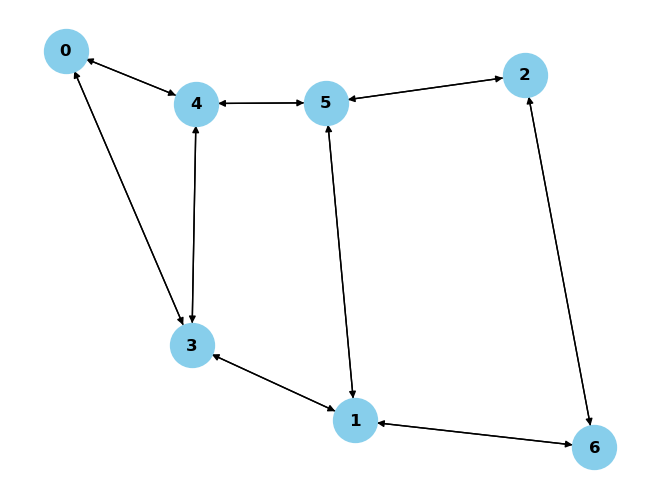

[[ 0.   0.   0.   1.2  9.2  0.   0. ]
 [ 0.   0.   0.   5.   0.   3.1  2. ]
 [ 0.   0.   0.   0.   0.   4.   1.5]
 [ 1.2  5.   0.   0.   6.7  0.   0. ]
 [ 9.2  0.   0.   6.7  0.  15.6  0. ]
 [ 0.   3.1  4.   0.  15.6  0.   0. ]
 [ 0.   2.   1.5  0.   0.   0.   0. ]]


In [63]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 定义邻接矩阵，无穷大表示不通
matrix = [[0, -1, -1, 1.2, 9.2, -1, -1],
          [-1, 0, -1, 5, -1, 3.1, 2],
          [-1, -1, 0, -1, -1, 4, 1.5],
          [1.2, 5, -1, 0, 6.7, -1, -1],
          [9.2, -1, -1, 6.7, 0, 15.6, -1],
          [-1, 3.1, 4, -1, 15.6, 0, -1],
          [-1, 2, 1.5, -1, -1, -1, 0]]
matrix_f = [[0, -1, -1, -1, 9.2, -1, -1],
          [-1, 0, -1, 5, -1, 3.1, 2],
          [-1, -1, 0, -1, -1, 4, 1.5],
          [1.2, 5, -1, 0, 6.7, -1, -1],
          [9.2, -1, -1, 6.7, 0, 15.6, -1],
          [-1, 3.1, 4, -1, 15.6, 0, -1],
          [-1, 2, 1.5, -1, -1, -1, 0]]
#graph,route,route_d,distance = floyd(matrix_f,1,7)
matrix = [[0 if val == -1 else val for val in row] for row in matrix]
matrix = np.array(matrix)
# 判断是否为对称矩阵
is_symmetric = np.all(matrix == matrix.T)

if is_symmetric:
    print("矩阵是对称矩阵。")
else:
    print("矩阵不是对称矩阵。")


# 创建有向图
G = nx.DiGraph(matrix)

# 绘制图形
pos = nx.spring_layout(G)  # 设置节点位置
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold')
plt.show()
print(matrix)

In [36]:
route_d

[1, 4, 2, 7]

In [37]:
distance

19.4

In [38]:
route

[[0, 4, 7, 5, 4, 4, 4],
 [4, 0, 7, 4, 4, 6, 7],
 [7, 7, 0, 7, 7, 6, 7],
 [1, 2, 7, 0, 5, 2, 2],
 [4, 4, 7, 4, 0, 4, 4],
 [4, 2, 3, 2, 4, 0, 2],
 [4, 2, 3, 2, 4, 2, 0]]